# Project: Investigate a Dataset (TMDb Movie Dataset)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

I will be analyzing the MDb Movie dataset. This dataset includes information of over 10,000 movie titles that include data such as popularity, budget, revenue, directors, cast, genre runtime, release date, ratings etc.

I will explore the data in order to answer these questions:

1) Who is the most successful director?

2) Have average movie runtime increased or decreased over time?<br>
3) Is popularity correlated with budget?<br>

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. In order to work with the data in this workspace, you also need to upload it to the workspace. To do so, click on the jupyter icon in the upper left to be taken back to the workspace directory. There should be an 'Upload' button in the upper right that will let you add your data file(s) to the workspace. You can then click on the .ipynb file name to come back here.

In [4]:
# Import statements for all of the packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [5]:
# Load your data and print out a few lines.
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [6]:
# Inspect data types and look for instances of missing or possibly errant data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

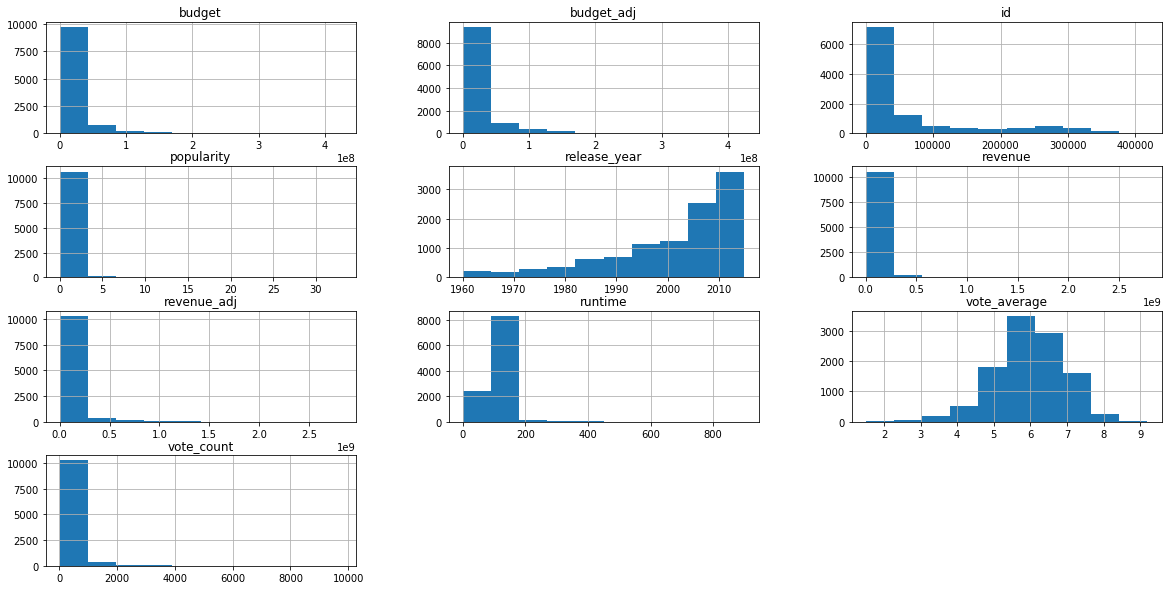

In [7]:
df.hist(figsize = (20,10));

In [8]:
# Checking for duplicate rows
df.duplicated().value_counts()

False    10865
True         1
dtype: int64

In [9]:
# Looking for zero budget rows
df.query('budget == 0').shape

(5696, 21)

In [10]:
# Looking for zero revenue rows
df.query('revenue == 0').shape

(6016, 21)

In [11]:
# Looking for zero runtime rows
df.query('runtime == 0').shape

(31, 21)

In [ ]:
The histogram for popularity shows that the data is skewed to the right so I will explore this data further.

In [14]:
# Exploring popularity data
df.popularity

0        32.985763
1        28.419936
2        13.112507
3        11.173104
4         9.335014
5         9.110700
6         8.654359
7         7.667400
8         7.404165
9         6.326804
10        6.200282
11        6.189369
12        6.118847
13        5.984995
14        5.944927
15        5.898400
16        5.749758
17        5.573184
18        5.556818
19        5.476958
20        5.462138
21        5.337064
22        4.907832
23        4.710402
24        4.648046
25        4.566713
26        4.564549
27        4.503789
28        4.062293
29        3.968891
           ...    
10836     0.239435
10837     0.291704
10838     0.151845
10839     0.276133
10840     0.102530
10841     0.264925
10842     0.253437
10843     0.252399
10844     0.236098
10845     0.230873
10846     0.212716
10847     0.034555
10848     0.207257
10849     0.206537
10850     0.202473
10851     0.342791
10852     0.227220
10853     0.163592
10854     0.146402
10855     0.141026
10856     0.140934
10857     0.

It looks like there are a large number of entries with a popularity <1 so I will explore this further.

In [16]:
# Checking entries with popularity rating <1
df.query('popularity < 1').shape

(9110, 21)

In [17]:
# Checking entries with popularity rating >1
df.query('popularity > 1').shape

(1756, 21)

It seems that the popularity rating is skewed to the right and has an extremely large range of floats with the max of 32.985763 and a min of 0.035919. Additionally, 9110 out of 10866 movies have a popularity rating of < 1.

In [23]:
df.vote_average.min()

1.5

In [24]:
df.vote_average.max()

9.1999999999999993

DATA OBSERVATIONS:

1) There are a total of 10866 rows and total 21 columns.<br> 
2) All the data types for each column seem reasonable for this dataset.<br>
3) Columns: imdb_id, cast, homepage, director, tagline, keywords, overview, genres, and production_companies all have null values<br>
4) There is 1 duplicate row<br>
5) There are 5696 rows with 0 budget, 6016 rows with 0 revenue, and there are 31 rows with 0 runtime.<br>
6) release_date is not in proper date format.<br>
7) popularity data is skewed to the right.<br>
8) vote_average has a normal distribution with a min of 1.5 and max of 9.2

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning

I will be taking the below steps in order to clean the data for better analysis:

  1) Remove columns that do not provide relevant information or data for our analysis.
  <br>
  2) Remove duplicate rows.
  <br>
  3) Convert 'release_date' column to date format.
  <br>
  4) Remove rows with 0 budget.
  <br>
  5) Remove rows with 0 revenue.
  <br>
  6) Remove rows with 0 runtime.

In [96]:
# 1) Remove columns that do not provide relevant information or data for our analysis. 

# List of columns that should be dropped because it is irrelevant to the analysis
drop_columns = ['id', 'imdb_id', 'budget_adj', 'revenue_adj', 'cast', 'homepage',  'tagline', 'genres', 'production_companies', 'keywords', 'overview']

# Drop the columns
df.drop(drop_columns, axis = 1, inplace = True)

# Verify new dataset
df.head()

,popularity,budget,revenue,original_title,director,runtime,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,6/9/15,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,5/13/15,6185,7.1,2015
2,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,3/18/15,2480,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,12/15/15,5292,7.5,2015
4,9.335014,190000000,1506249360,Furious 7,James Wan,137,4/1/15,2947,7.3,2015


In [97]:
# 2) Remove duplicate rows. 

# Drop duplicate rows
df.drop_duplicates(inplace=True)

# Verify there are no more duplicate rows
df.duplicated().value_counts()

False    10865
dtype: int64

In [98]:
# 3) Convert 'release_date' column to date format. 

# Convert data in 'release_date' column to proper date time format
df['release_date'] = pd.to_datetime(df['release_date'])

# Verify datetime format
df.head(1)

,popularity,budget,revenue,original_title,director,runtime,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,2015-06-09,5562,6.5,2015


In [99]:
# 4) Remove rows with 0 budget.

# Replace all '0' to NAN in budget column
df['budget'] = df['budget'].replace(0, np.NAN)

# Drop rows with budget NaN values
df.dropna(subset = ['budget'], inplace = True)

# Verify there are no more 0 budget rows
df.query('budget == 0').shape

(0, 10)

In [100]:
# 5) Remove rows with 0 revenue.

# Replace all '0' to NAN in revenue column
df['revenue'] = df['revenue'].replace(0, np.NAN)

# Drop rows with revenue NaN values
df.dropna(subset = ['revenue'], inplace = True)

# Verify there are no more 0 revenue rows
df.query('revenue == 0').shape

(0, 10)

In [101]:
# 6) Remove rows with 0 runtime.

# Replace all '0' to NAN in runtime column
df['runtime'] = df['runtime'].replace(0, np.NAN)

# Drop rows with runtime NaN values
df.dropna(subset = ['runtime'], inplace = True)

# Verify there are no more 0 runtime rows
df.query('runtime == 0').shape

(0, 10)

In [102]:
# Checking new dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 10 columns):
popularity        3854 non-null float64
budget            3854 non-null float64
revenue           3854 non-null float64
original_title    3854 non-null object
director          3853 non-null object
runtime           3854 non-null int64
release_date      3854 non-null datetime64[ns]
vote_count        3854 non-null int64
vote_average      3854 non-null float64
release_year      3854 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(3), object(2)
memory usage: 331.2+ KB


It appears that there an entry in director column that has null values. So I chose to remove that as well.

In [103]:
# Remove null values from cast column.
df.dropna(subset = ['director'], inplace=True)

# Check final dataset
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3853 entries, 0 to 10848
Data columns (total 10 columns):
popularity        3853 non-null float64
budget            3853 non-null float64
revenue           3853 non-null float64
original_title    3853 non-null object
director          3853 non-null object
runtime           3853 non-null int64
release_date      3853 non-null datetime64[ns]
vote_count        3853 non-null int64
vote_average      3853 non-null float64
release_year      3853 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(3), object(2)
memory usage: 331.1+ KB


,popularity,budget,revenue,original_title,director,runtime,release_date,vote_count,vote_average,release_year
0,32.985763,150000000.0,1.513529e+09,Jurassic World,Colin Trevorrow,124,2015-06-09,5562,6.5,2015
1,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,George Miller,120,2015-05-13,6185,7.1,2015
2,13.112507,110000000.0,2.952382e+08,Insurgent,Robert Schwentke,119,2015-03-18,2480,6.3,2015
3,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,J.J. Abrams,136,2015-12-15,5292,7.5,2015
4,9.335014,190000000.0,1.506249e+09,Furious 7,James Wan,137,2015-04-01,2947,7.3,2015


We can see from the table above that the final cleaned data set is free from any null values. And that all data types are correct and in the proper format.

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### 1) Top 10 Directors with the highest revenue and highest profit?

To explore who isthe most successful director I will be analyzing: <br>
1) average revenue <br>
2) average profit <br>
3) average movie rating <br>

Although we have data for popularity rating, the data is skewed very far to the right and I am unsure of the rating scale and its consistency. So I will be analyzing vote_average data as a measure of popularity since that data looks to be cleaner and has a 

In [18]:
df_popular = df.groupby('director')['vote_average'].mean().reset_index()
df_popular = df_popular.sort_values('vote_average', ascending=False)
top5_popular = df_popular.head(5)
top5_popular

,director,vote_average
3109,Mark Cousins,9.2
1245,Derek Frankowski,8.8
1148,David Mallet,8.7
3176,Martin Scorsese|Michael Henry Wilson,8.5
2046,James Payne,8.5


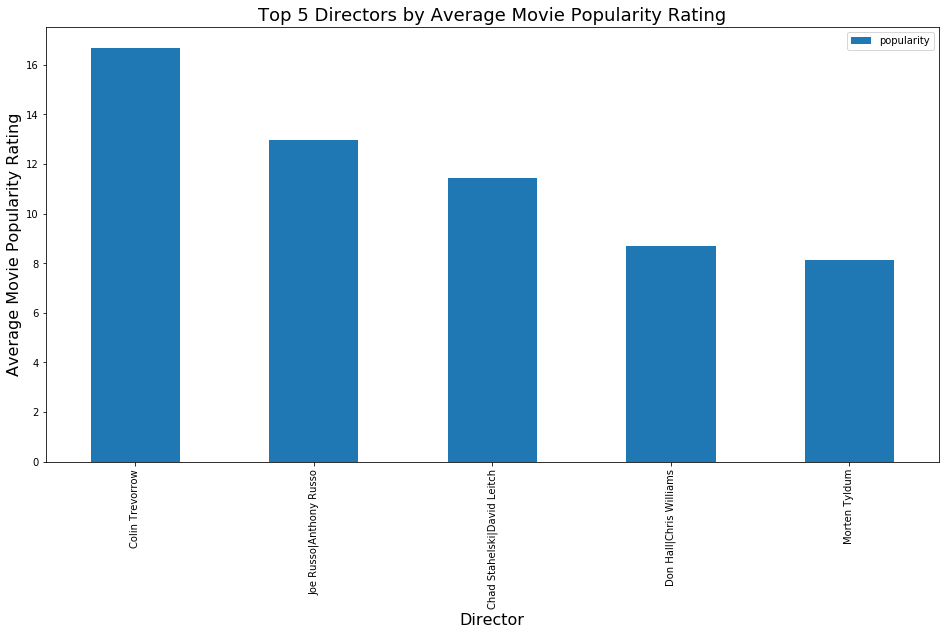

In [129]:
top5_popular.plot.bar(x= 'director', y= ['popularity'], figsize=(16,8))
plt.title('Top 5 Directors by Average Movie Popularity Rating', fontsize = 18)
plt.xlabel('Director', fontsize = 16)
plt.ylabel('Average Movie Popularity Rating', fontsize = 16);

Observation: Colin Trevorrow is the director associated with the highest average movie rating of 16.7.

In [132]:
df_profit = df.groupby('director')['budget','revenue', 'profit_loss'].sum().sort_values('revenue', ascending=False)
df_profit = df_profit.reset_index()
top5_profit = df_profit.head(5)
top5_profit

,director,budget,revenue,profit_loss
0,Steven Spielberg,1.551500e+09,9.018564e+09,7.467064e+09
1,Peter Jackson,1.326000e+09,6.523245e+09,5.197245e+09
2,James Cameron,7.599000e+08,5.841895e+09,5.081995e+09
3,Michael Bay,1.360000e+09,4.917208e+09,3.557208e+09
4,Christopher Nolan,1.005000e+09,4.167549e+09,3.162549e+09


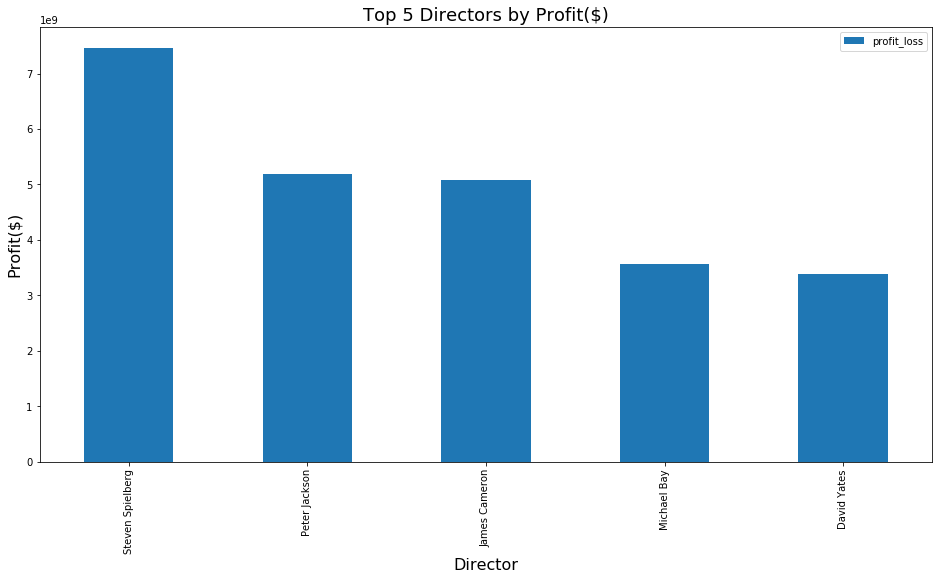

In [123]:
top5_profit.plot.bar(x= 'director', y= ['profit_loss'], figsize=(16,8))
plt.title('Top 5 Directors by Profit($)', fontsize = 18)
plt.xlabel('Director', fontsize = 16)
plt.ylabel('Profit($)', fontsize = 16);

Observation: Movies directed by Steven Spielberg have earned the highest amount of profit of $7.5 billion in our dataset.

In [ ]:
Conclusion: This is very interesting in that Colin Trevorrow has the highest average movie rating but he does not earn the highest pr

### 2) Have average movie runtime increased or decreased over time?

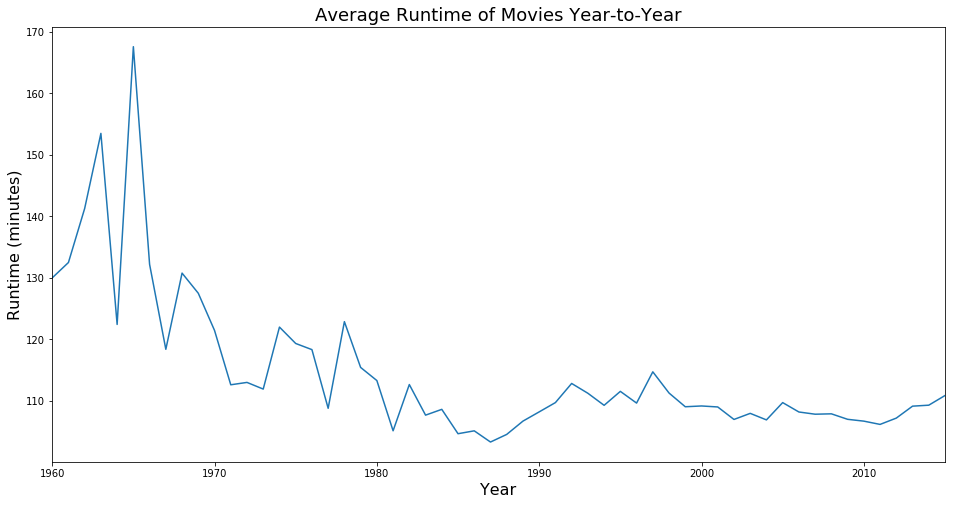

In [83]:
df.groupby('release_year')['runtime'].mean().plot(kind='line', figsize = (16, 8))
plt.title('Average Runtime of Movies Year-to-Year', fontsize = 18)
plt.xlabel('Year', fontsize = 16)
plt.ylabel('Runtime (minutes)', fontsize = 16);

The average runtime of movies has decreased with over time. The highest average runtimes were during the 1960s where the max runtime was over 160 minutes. However over time the average runtimes have decreased. The period of lowest average runtimes is between 1985 and 1990. Currently movie runtimes average around 110 minutes.

In [18]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [19]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0